In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

C:\Users\VAISHANAVI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.4076 - loss: 1.6386 - val_accuracy: 0.8865 - val_loss: 0.3746
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8976 - loss: 0.3450 - val_accuracy: 0.9386 - val_loss: 0.2234
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9381 - loss: 0.2108 - val_accuracy: 0.9520 - val_loss: 0.1726
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9528 - loss: 0.1573 - val_accuracy: 0.9641 - val_loss: 0.1151
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9616 - loss: 0.1278 - val_accuracy: 0.9692 - val_loss: 0.1048
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9665 - loss: 0.1069 - val_accuracy: 0.9716 - val_loss: 0.0942
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9692 - loss: 0.0985 - val_accuracy: 0.9715 - val_loss: 0.0899
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9743 - loss: 0.0823 - 

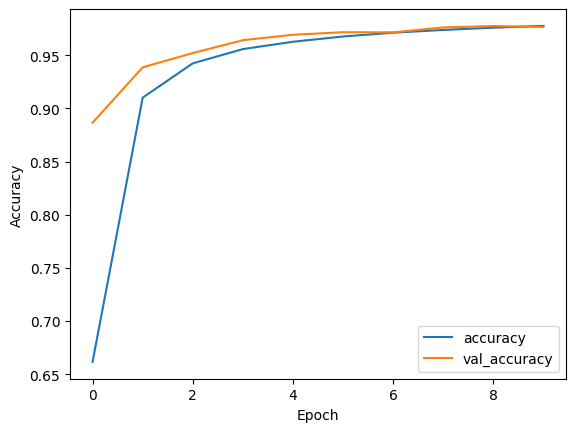

In [5]:
#normalize
x_train, x_test = x_train / 255.0, x_test /255.0
# Reshape the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
#define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history=model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
# Evaluate the model        
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy: {test_acc:.4f}')
# plot the results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

